# CDR3 Lifespan

Run the following cell to get a graph of cdr3 frequencies changing over time.

computation starting...


2021-04-10 05:34 PM 09.973 sec, main_cdr3_lifespan.py, line 37, INFO| cdr3s=['cASSQELDSYGYTf', 'cASSEAGGADEQFf', 'cASSQDAGSSGNTIYf', 'cASSQRGTLPSYEQYf'], x=[datetime.datetime(2018, 1, 1, 0, 0), datetime.datetime(2018, 1, 8, 0, 0), datetime.datetime(2018, 1, 29, 0, 0), datetime.datetime(2018, 5, 2, 16, 0), datetime.datetime(2020, 1, 1, 0, 0)], ys=[[13315, 71998, 77660, 64361, 261801], [28679, 7300, 5808, 21530, 38919], [5550, 9080, 10568, 8553, 36688], [23019, 47000, 25792, 19032, 25592]], fnames=['cdr3.b.A_2017_2018_d_00_53535.ann', 'cdr3.b.A_2017_2018_d_07_11143.ann', 'cdr3.b.A_2017_2018_d_28_44887.ann', 'cdr3.b.A_2017_2018_m_04_73516.ann', 'cdr3.b.A_2019_2020_d_00_20857.ann']


show_log: False


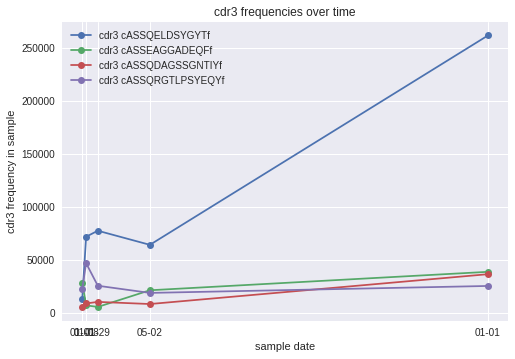

computation complete.


In [2]:
import data_utils
import main_cdr3_lifespan

print('computation starting...')
sample = data_utils.get_cdr3_counter_from_file('s', 'cdr3.b.A_2019_2020_d_00_20857.ann')
cdr3s = [sample.get_cdr3_by_rank(r) for r in range(1, 5)] # <- top 4 cdr3 sequences occuring in cdr3.b.A_2019_2020_d_00_20857.ann
main_cdr3_lifespan.calculate_one(
    # list of cdr3 sequences you want to graph
    cdr3s=cdr3s,
    # Sample file names from which to grab cdr3 frequency data.
    # Typically all files are from the SAME person.
    # Each file will correspond to a single date on the x-axis of the graph.
    file_names=[
      'cdr3.b.A_2017_2018_d_00_53535.ann',
      'cdr3.b.A_2017_2018_d_07_11143.ann',
      'cdr3.b.A_2017_2018_d_28_44887.ann',
      'cdr3.b.A_2017_2018_m_04_73516.ann',
      'cdr3.b.A_2019_2020_d_00_20857.ann',
    ],
    # whether or not to display the cdr3 legend in the graph
    show_legend=True,
    # whether or not to display log outputs here
    show_log=False,
)
print('computation complete.')
